In [1]:
import pandas as pd

In [2]:
data_2019 = pd.read_csv('Data/London-2019-11-listings.csv', low_memory=False)
data_2020 = pd.read_csv('Data/London-2020-11-listings.csv', low_memory=False)
data_2021 = pd.read_csv('Data/London-2021-10-listings.csv', low_memory=False)
data_2022 = pd.read_csv('Data/London-2022-09-10-listings.csv', low_memory=False)
data_2023 = pd.read_csv('Data/London-2023-09-06-listings.csv', low_memory=False)

In [3]:
# 定义要保留的列名及其在不同年份数据集中的可能变体
columns_mapping = {
    'id': ['id'],
    'name': ['name'],
    'latitude': ['latitude'],
    'longitude': ['longitude'],
    'neighbourhood': ['neighbourhood', 'neighborhood', 'neighbourhood_cleansed'],
    'room_type': ['room_type'],
    'price': ['price'],
    'minimum_nights': ['minimum_nights'],
    'availability_365': ['availability_365'],
    'number_of_reviews': ['number_of_reviews'],
    'reviews_per_month': ['reviews_per_month'],
    'last_review': ['last_review'],
    'host_id': ['host_id'],
    'calculated_host_listings_count': ['calculated_host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
}

In [4]:
# 应用映射来调整一个数据集的列名
def adjust_column_names(dataframe, column_mapping):
    for standardized_name, potential_names in column_mapping.items():
        for potential_name in potential_names:
            if potential_name in dataframe.columns:
                dataframe.rename(columns={potential_name: standardized_name}, inplace=True)
                break  # 一旦找到并重命名，跳出循环

In [5]:
adjust_column_names(data_2019, columns_mapping)
adjust_column_names(data_2020, columns_mapping)
adjust_column_names(data_2021, columns_mapping)
adjust_column_names(data_2022, columns_mapping)

In [6]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85236 non-null  object
 1   name                            85235 non-null  object
 2   host_id                         85236 non-null  object
 3   host_name                       85236 non-null  object
 4   neighbourhood_group             85236 non-null  object
 5   neighbourhood                   85236 non-null  object
 6   latitude                        85236 non-null  object
 7   longitude                       85236 non-null  object
 8   room_type                       85236 non-null  object
 9   price                           85236 non-null  object
 10  minimum_nights                  85236 non-null  object
 11  number_of_reviews               85236 non-null  object
 12  last_review                     85236 non-null

In [7]:
def check_ifMatched_columns(dataframe, column_mapping):
    standardized_columns = set(column_mapping.keys())
    dataframe_columns = set(dataframe.columns)
    
    # 查找数据集中存在但不在标准化列名中的列
    unmatched_columns = dataframe_columns - standardized_columns
    matched_columns = dataframe_columns & standardized_columns

    return unmatched_columns, matched_columns

In [8]:
# 使用函数检查未匹配的列
unmatched_columns, matched_columns = check_ifMatched_columns(data_2019, columns_mapping)

print("未匹配的列：", unmatched_columns)
print("匹配的列：", matched_columns)

# 手动处理这些列
# 决定删除某个未匹配的列
# data.drop(columns=['unwanted_column'], inplace=True)

# 或者重命名某个未匹配的列
# data.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

未匹配的列： {'room_class', 'neighbourhood_group', 'last_review_timestamp', 'host_name'}
匹配的列： {'latitude', 'number_of_reviews', 'price', 'calculated_host_listings_count', 'name', 'minimum_nights', 'neighbourhood', 'room_type', 'id', 'availability_365', 'reviews_per_month', 'host_id', 'last_review', 'longitude'}


In [9]:
# 使用函数检查未匹配的列
unmatched_columns, matched_columns = check_ifMatched_columns(data_2020, columns_mapping)

print("未匹配的列：", unmatched_columns)
print("匹配的列：", matched_columns)

未匹配的列： {'minimum_minimum_nights', 'maximum_nights_avg_ntm', 'first_review', 'bathrooms_text', 'review_scores_communication', 'neighbourhood_group_cleansed', 'host_is_superhost', 'maximum_maximum_nights', 'host_total_listings_count', 'availability_90', 'bedrooms', 'host_name', 'host_neighbourhood', 'host_acceptance_rate', 'host_picture_url', 'minimum_nights_avg_ntm', 'host_since', 'description', 'host_identity_verified', 'last_scraped', 'calendar_updated', 'host_url', 'bathrooms', 'amenities', 'number_of_reviews_ltm', 'maximum_nights', 'listing_url', 'neighbourhood_cleansed', 'picture_url', 'availability_30', 'calculated_host_listings_count_entire_homes', 'calendar_last_scraped', 'instant_bookable', 'host_has_profile_pic', 'host_about', 'calculated_host_listings_count_private_rooms', 'host_verifications', 'host_thumbnail_url', 'scrape_id', 'review_scores_location', 'license', 'neighborhood_overview', 'host_listings_count', 'review_scores_rating', 'host_location', 'review_scores_value', 

In [10]:
# 使用函数检查未匹配的列
unmatched_columns, matched_columns = check_ifMatched_columns(data_2021, columns_mapping)

print("未匹配的列：", unmatched_columns)
print("匹配的列：", matched_columns)

未匹配的列： {'minimum_minimum_nights', 'maximum_nights_avg_ntm', 'first_review', 'bathrooms_text', 'review_scores_communication', 'neighbourhood_group_cleansed', 'host_is_superhost', 'maximum_maximum_nights', 'host_total_listings_count', 'availability_90', 'bedrooms', 'host_name', 'host_neighbourhood', 'host_acceptance_rate', 'host_picture_url', 'minimum_nights_avg_ntm', 'host_since', 'description', 'host_identity_verified', 'last_scraped', 'calendar_updated', 'host_url', 'bathrooms', 'amenities', 'number_of_reviews_ltm', 'maximum_nights', 'listing_url', 'neighbourhood_cleansed', 'picture_url', 'availability_30', 'calculated_host_listings_count_entire_homes', 'calendar_last_scraped', 'instant_bookable', 'host_has_profile_pic', 'host_about', 'calculated_host_listings_count_private_rooms', 'host_verifications', 'host_thumbnail_url', 'scrape_id', 'review_scores_location', 'license', 'neighborhood_overview', 'host_listings_count', 'review_scores_rating', 'host_location', 'review_scores_value', 

In [11]:
# 使用函数检查未匹配的列
unmatched_columns, matched_columns = check_ifMatched_columns(data_2022, columns_mapping)

print("未匹配的列：", unmatched_columns)
print("匹配的列：", matched_columns)

未匹配的列： {'minimum_minimum_nights', 'maximum_nights_avg_ntm', 'first_review', 'bathrooms_text', 'review_scores_communication', 'neighbourhood_group_cleansed', 'host_is_superhost', 'maximum_maximum_nights', 'host_total_listings_count', 'availability_90', 'bedrooms', 'host_name', 'host_neighbourhood', 'host_acceptance_rate', 'host_picture_url', 'minimum_nights_avg_ntm', 'host_since', 'description', 'host_identity_verified', 'source', 'last_scraped', 'calendar_updated', 'host_url', 'bathrooms', 'amenities', 'number_of_reviews_ltm', 'maximum_nights', 'listing_url', 'neighbourhood_cleansed', 'picture_url', 'availability_30', 'calculated_host_listings_count_entire_homes', 'calendar_last_scraped', 'instant_bookable', 'host_has_profile_pic', 'host_about', 'calculated_host_listings_count_private_rooms', 'host_verifications', 'host_thumbnail_url', 'scrape_id', 'review_scores_location', 'license', 'neighborhood_overview', 'host_listings_count', 'review_scores_rating', 'host_location', 'review_score

In [12]:
# 使用函数检查未匹配的列
unmatched_columns, matched_columns = check_ifMatched_columns(data_2023, columns_mapping)

print("未匹配的列：", unmatched_columns)
print("匹配的列：", matched_columns)

未匹配的列： {'license', 'neighbourhood_group', 'number_of_reviews_ltm', 'host_name'}
匹配的列： {'latitude', 'number_of_reviews', 'price', 'calculated_host_listings_count', 'name', 'minimum_nights', 'neighbourhood', 'room_type', 'id', 'availability_365', 'reviews_per_month', 'host_id', 'last_review', 'longitude'}


In [13]:
# 定义所有数据集共有的匹配列
matched_columns = ['host_id', 'id', 'calculated_host_listings_count', 'name', 'minimum_nights', 'latitude', 'room_type', 'price', 'availability_365', 'number_of_reviews', 'longitude', 'last_review', 'neighbourhood', 'reviews_per_month']

# 确保每个数据集只包含这些匹配列，并创建副本
data_2019_selected = data_2019[matched_columns].copy()
data_2020_selected = data_2020[matched_columns].copy()
data_2021_selected = data_2021[matched_columns].copy()
data_2022_selected = data_2022[matched_columns].copy()
data_2023_selected = data_2023[matched_columns].copy()

# 为每个数据集添加年份列
data_2019_selected['year'] = 2019
data_2020_selected['year'] = 2020
data_2021_selected['year'] = 2021
data_2022_selected['year'] = 2022
data_2023_selected['year'] = 2023

# 合并数据集
all_data = pd.concat([data_2019_selected, data_2020_selected, data_2021_selected, data_2022_selected, data_2023_selected])

# 重置索引
all_data.reset_index(drop=True, inplace=True)


In [14]:
all_data.info()
all_data.head()
all_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390135 entries, 0 to 390134
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   host_id                         390135 non-null  object
 1   id                              390135 non-null  object
 2   calculated_host_listings_count  390135 non-null  object
 3   name                            390066 non-null  object
 4   minimum_nights                  390135 non-null  object
 5   latitude                        390135 non-null  object
 6   room_type                       390135 non-null  object
 7   price                           390135 non-null  object
 8   availability_365                390135 non-null  object
 9   number_of_reviews               390135 non-null  object
 10  longitude                       390135 non-null  object
 11  last_review                     308377 non-null  object
 12  neighbourhood                 

(390135, 15)

In [15]:
# 计算包含至少一个缺失值的行数
num_rows_with_missing_values = all_data.isna().any(axis=1).sum()
print(f"包含至少一个缺失值的行数: {num_rows_with_missing_values}")

包含至少一个缺失值的行数: 134065


In [16]:
# 计算每列的缺失值数量
missing_values_per_column = all_data.isna().sum()

# 打印每列的缺失值数量
print(missing_values_per_column)

host_id                               0
id                                    0
calculated_host_listings_count        0
name                                 69
minimum_nights                        0
latitude                              0
room_type                             0
price                                 0
availability_365                      0
number_of_reviews                     0
longitude                             0
last_review                       81758
neighbourhood                     87128
reviews_per_month                 81758
year                                  0
dtype: int64


In [17]:
# 删除 'name' 列中含有缺失值的行
all_data.dropna(subset=['name'], inplace=True)

# 对每个年份计算 last_review 的众数
mode_per_year = all_data.groupby('year')['last_review'].agg(pd.Series.mode)

# 对于每个年份的数据，填充 last_review 的缺失值为该年份的众数
for year in mode_per_year.index:
    mode = mode_per_year[year]
    # 如果众数是一个系列，则取第一个元素
    if isinstance(mode, pd.Series):
        mode = mode.iloc[0]
    all_data.loc[all_data['year'] == year, 'last_review'] = all_data.loc[all_data['year'] == year, 'last_review'].fillna(mode)

# 确保 reviews_per_month 列是数值类型
all_data['reviews_per_month'] = pd.to_numeric(all_data['reviews_per_month'], errors='coerce')

# 对每个年份计算 reviews_per_month 的平均值
mean_per_year = all_data.groupby('year')['reviews_per_month'].mean()

# 对于每个年份的数据，填充 reviews_per_month 的缺失值为该年份的平均值
for year in mean_per_year.index:
    mean = mean_per_year[year]
    all_data.loc[all_data['year'] == year, 'reviews_per_month'] = all_data.loc[all_data['year'] == year, 'reviews_per_month'].fillna(mean)

# 填充 neighbourhood 列的缺失值为 "Unknown"
all_data['neighbourhood'].fillna("Unknown", inplace=True)

print(all_data.isna().sum())

host_id                           0
id                                0
calculated_host_listings_count    0
name                              0
minimum_nights                    0
latitude                          0
room_type                         0
price                             0
availability_365                  0
number_of_reviews                 0
longitude                         0
last_review                       0
neighbourhood                     0
reviews_per_month                 0
year                              0
dtype: int64


In [18]:
all_data.info()
all_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 390066 entries, 0 to 390134
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_id                         390066 non-null  object 
 1   id                              390066 non-null  object 
 2   calculated_host_listings_count  390066 non-null  object 
 3   name                            390066 non-null  object 
 4   minimum_nights                  390066 non-null  object 
 5   latitude                        390066 non-null  object 
 6   room_type                       390066 non-null  object 
 7   price                           390066 non-null  object 
 8   availability_365                390066 non-null  object 
 9   number_of_reviews               390066 non-null  object 
 10  longitude                       390066 non-null  object 
 11  last_review                     390066 non-null  object 
 12  neighbourhood        

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35,278,47,-.379,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572,23013522,3,"Spacious room with double bed for 2, Twickenham",1,51.45867,Private room,19,23,131,-.34444,2019-11-06,Hounslow,6.52,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103,317,8,-.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.52716,Entire home/apt,85,346,5,-.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85,139,16,-.1667,2019-11-06,Barnet,1.52,2019


In [19]:
# 首先移除价格中的非数字字符（如货币符号、逗号、空格等）
all_data['price'] = all_data['price'].replace('[\$, ]', '', regex=True)
# 将字符串转换为数值类型
# 定义需要转换为数值的列名
numeric_columns = ['host_id', 'id', 'calculated_host_listings_count', 'minimum_nights', 'latitude', 'availability_365', 'number_of_reviews', 'longitude', 'reviews_per_month', 'price']

# 循环遍历每个列名，将其转换为数值类型
for column in numeric_columns:
    all_data[column] = pd.to_numeric(all_data[column], errors='coerce')

# 检查转换后的数据类型
print(all_data.dtypes)
all_data.head()

host_id                           float64
id                                float64
calculated_host_listings_count    float64
name                               object
minimum_nights                    float64
latitude                          float64
room_type                          object
price                             float64
availability_365                  float64
number_of_reviews                 float64
longitude                         float64
last_review                        object
neighbourhood                      object
reviews_per_month                 float64
year                                int64
dtype: object


,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995.0,9582415.0,1.0,Single/Twin/Double Ensuite near Twickenham Sta...,1.0,51.44473,Private room,35.0,278.0,47.0,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572.0,23013522.0,3.0,"Spacious room with double bed for 2, Twickenham",1.0,51.45867,Private room,19.0,23.0,131.0,-0.34444,2019-11-06,Hounslow,6.52,2019
2,25587547.0,25796711.0,1.0,Stunning Central London Apartment Close The River,7.0,51.47398,Entire home/apt,103.0,317.0,8.0,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790.0,29060134.0,1.0,Recently renovated fabulous four bedroom house,14.0,51.52716,Entire home/apt,85.0,346.0,5.0,-0.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684.0,30374086.0,3.0,Lovely cosy flat for 4 in Heart of North London,3.0,51.59118,Entire home/apt,85.0,139.0,16.0,-0.16670,2019-11-06,Barnet,1.52,2019


In [20]:
# 定义需要转换为整数的列名
integer_columns = ['host_id', 'id', 'calculated_host_listings_count', 'minimum_nights', 'availability_365', 'number_of_reviews']

# 循环遍历每个列名，将其转换为整数类型
for column in integer_columns:
    all_data[column] = pd.to_numeric(all_data[column], errors='coerce').fillna(0).astype(int)

# 检查转换后的数据类型
print(all_data.dtypes)
all_data.head()

host_id                             int64
id                                  int64
calculated_host_listings_count      int64
name                               object
minimum_nights                      int64
latitude                          float64
room_type                          object
price                             float64
availability_365                    int64
number_of_reviews                   int64
longitude                         float64
last_review                        object
neighbourhood                      object
reviews_per_month                 float64
year                                int64
dtype: object


,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
1,70374572,23013522,3,"Spacious room with double bed for 2, Twickenham",1,51.45867,Private room,19.0,23,131,-0.34444,2019-11-06,Hounslow,6.52,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
3,57607790,29060134,1,Recently renovated fabulous four bedroom house,14,51.52716,Entire home/apt,85.0,346,5,-0.44164,2019-11-06,Hillingdon,0.40,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019


In [21]:
# 循环遍历数据集的每一列
for column in all_data.columns:
    # 检查列的数据类型是否为 object
    if all_data[column].dtype == 'object':
        # 将 object 类型的列转换为字符串
        all_data[column] = all_data[column].astype(str)

# 检查转换后的数据类型
print(all_data.dtypes)

host_id                             int64
id                                  int64
calculated_host_listings_count      int64
name                               object
minimum_nights                      int64
latitude                          float64
room_type                          object
price                             float64
availability_365                    int64
number_of_reviews                   int64
longitude                         float64
last_review                        object
neighbourhood                      object
reviews_per_month                 float64
year                                int64
dtype: object


In [22]:
# 调整正则表达式以匹配格式 yyyy-mm-dd
date_pattern = r'\d{4}-\d{1,2}-\d{1,2}'

# 确保 last_review 列是字符串类型
all_data['last_review'] = all_data['last_review'].astype(str)

# 使用正则表达式来检查 last_review 字段中的每个值
# 如果值不符合日期格式 yyyy-mm-dd，则替换为 NaT
all_data['last_review'] = pd.to_datetime(
    all_data['last_review'].str.extract(f'(^{date_pattern}$)', expand=False), 
    errors='coerce'
)

# 删除 last_review 列中的 NaT 值
all_data = all_data.dropna(subset=['last_review'])

# 检查剩余数据
print(all_data['last_review'].head())

0   2019-11-06
1   2019-11-06
2   2019-11-06
3   2019-11-06
4   2019-11-06
Name: last_review, dtype: datetime64[ns]


In [23]:
import os

# 创建 Data 文件夹
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# 导出 DataFrame 到 CSV 文件
output_file = os.path.join(data_folder, "all_data.csv")
all_data.to_csv(output_file, index=False)

In [24]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels import RandomEffects
from sklearn.preprocessing import MinMaxScaler

In [25]:
df = pd.read_csv("Data_clean/all_data.csv", encoding="ISO-8859-1",parse_dates=['last_review'])

In [26]:
df.dtypes

host_id                                    int64
id                                         int64
calculated_host_listings_count             int64
name                                      object
minimum_nights                             int64
latitude                                 float64
room_type                                 object
price                                    float64
availability_365                           int64
number_of_reviews                          int64
longitude                                float64
last_review                       datetime64[ns]
neighbourhood                             object
reviews_per_month                        float64
year                                       int64
dtype: object

In [27]:
df_filtered = df[df["reviews_per_month"] > 0.5]
#define active offers as those listings which could be booked at least for one night in the following 60 days at the moment of scraping.
#Use the number of reviews to estimate the number of bookings, thereby selecting properties with more than 0.5 reviews per month as effective listings
#The analysis was restricted to active listings throughout the analysis.

In [28]:
top_2_percent = df_filtered["price"].quantile(0.98)
bottom_2_percent = df_filtered["price"].quantile(0.02)
#the average price was calculated for each city and month, based on the nightly price of available listings. 
#To eliminate outlier observations, the top 2% and bottom 2% percentile of offers were not taken into consideration. 

In [29]:
df_filtered1 = df_filtered[
    (df_filtered["price"] >= bottom_2_percent) & (df_filtered["price"] <= top_2_percent)
]

In [30]:
df_filtered1.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019


In [31]:
df_filtered2 = df_filtered1[df_filtered1["availability_365"] > 0]

In [32]:
df_filtered2.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019


In [33]:
df_filtered2.dtypes

host_id                                    int64
id                                         int64
calculated_host_listings_count             int64
name                                      object
minimum_nights                             int64
latitude                                 float64
room_type                                 object
price                                    float64
availability_365                           int64
number_of_reviews                          int64
longitude                                float64
last_review                       datetime64[ns]
neighbourhood                             object
reviews_per_month                        float64
year                                       int64
dtype: object

In [34]:
df_filtered3 = df_filtered2[
    (df_filtered2["last_review"].dt.year >= 2019)
    & (df_filtered2["last_review"].dt.year <= 2023)
]
#Properties that received reviews between 2019 and 2023 are determined to be effective listings.

In [35]:
columns_to_normalize = ["availability_365", "number_of_reviews", "reviews_per_month"]

In [36]:
scaler = MinMaxScaler()# 创建归一化器实例

In [37]:
# 对选定列进行归一化并创建新列

df_filtered3["availability_365" + "_normalized"] = scaler.fit_transform(
    df_filtered3[["availability_365"]]
)

# 显示数据的前几行以验证结果
df_filtered3.head()

/tmp/ipykernel_22235/3870308804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["availability_365" + "_normalized"] = scaler.fit_transform(


,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year,availability_365_normalized
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019,0.760989
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019,0.868132
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019,0.379121
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019,0.381868
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019,0.428571


In [38]:
df_filtered3["number_of_reviews" + "_normalized"] = scaler.fit_transform(
    df_filtered3[["number_of_reviews"]]
)
df_filtered3["reviews_per_month" + "_normalized"] = scaler.fit_transform(
    df_filtered3[["reviews_per_month"]]
)

/tmp/ipykernel_22235/1637088241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["number_of_reviews" + "_normalized"] = scaler.fit_transform(
/tmp/ipykernel_22235/1637088241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["reviews_per_month" + "_normalized"] = scaler.fit_transform(


In [39]:
df_filtered3["market_activity"] = (
    df_filtered3["availability_365_normalized"]
    + df_filtered3["number_of_reviews_normalized"]
    + df_filtered3["reviews_per_month_normalized"]
)

/tmp/ipykernel_22235/2071844040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["market_activity"] = (


In [40]:
df_filtered3.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,longitude,last_review,neighbourhood,reviews_per_month,year,availability_365_normalized,number_of_reviews_normalized,reviews_per_month_normalized,market_activity
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,-0.37900,2019-11-06,Richmond upon Thames,2.27,2019,0.760989,0.030599,0.014943,0.806531
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,-0.21531,2019-11-06,Hammersmith and Fulham,0.51,2019,0.868132,0.005208,0.000000,0.873340
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,-0.16670,2019-11-06,Barnet,1.52,2019,0.379121,0.010417,0.008575,0.398113
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,-0.27561,2019-11-06,Kingston upon Thames,5.17,2019,0.381868,0.032552,0.039565,0.453986
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,-0.39746,2019-11-06,Harrow,2.69,2019,0.428571,0.009766,0.018509,0.456846


In [41]:
df_filtered3["year_copy"] = df_filtered3["year"]
df_filtered3["id_copy"] = df_filtered3["id"]

/tmp/ipykernel_22235/1712333500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["year_copy"] = df_filtered3["year"]
/tmp/ipykernel_22235/1712333500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["id_copy"] = df_filtered3["id"]


In [42]:
# 假设 COVID 期间为 2020 年和 2021 年
df_filtered3["covid_period"] = df_filtered3["year"].isin([2020, 2021]).astype(int)

/tmp/ipykernel_22235/3104444095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["covid_period"] = df_filtered3["year"].isin([2020, 2021]).astype(int)


In [43]:
df_filtered3.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,...,neighbourhood,reviews_per_month,year,availability_365_normalized,number_of_reviews_normalized,reviews_per_month_normalized,market_activity,year_copy,id_copy,covid_period
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,...,Richmond upon Thames,2.27,2019,0.760989,0.030599,0.014943,0.806531,2019,9582415,0
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,...,Hammersmith and Fulham,0.51,2019,0.868132,0.005208,0.000000,0.873340,2019,25796711,0
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,...,Barnet,1.52,2019,0.379121,0.010417,0.008575,0.398113,2019,30374086,0
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,...,Kingston upon Thames,5.17,2019,0.381868,0.032552,0.039565,0.453986,2019,31300930,0
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,...,Harrow,2.69,2019,0.428571,0.009766,0.018509,0.456846,2019,34733139,0


In [44]:
df_filtered3["year_2019"] = (df_filtered3["year"] == 2019).astype(int)

/tmp/ipykernel_22235/2137878903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["year_2019"] = (df_filtered3["year"] == 2019).astype(int)


In [45]:
df_filtered3["year_2023"] = (df_filtered3["year"] == 2023).astype(int)

/tmp/ipykernel_22235/3157473834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3["year_2023"] = (df_filtered3["year"] == 2023).astype(int)


In [46]:
df_filtered3.head()

,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,room_type,price,availability_365,number_of_reviews,...,year,availability_365_normalized,number_of_reviews_normalized,reviews_per_month_normalized,market_activity,year_copy,id_copy,covid_period,year_2019,year_2023
0,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,Private room,35.0,278,47,...,2019,0.760989,0.030599,0.014943,0.806531,2019,9582415,0,1,0
2,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,Entire home/apt,103.0,317,8,...,2019,0.868132,0.005208,0.000000,0.873340,2019,25796711,0,1,0
4,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,Entire home/apt,85.0,139,16,...,2019,0.379121,0.010417,0.008575,0.398113,2019,30374086,0,1,0
5,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,Private room,32.0,140,50,...,2019,0.381868,0.032552,0.039565,0.453986,2019,31300930,0,1,0
6,246523174,34733139,2,room in the cottage,2,51.59863,Private room,30.0,157,15,...,2019,0.428571,0.009766,0.018509,0.456846,2019,34733139,0,1,0


In [47]:
df_filtered3 = pd.get_dummies(df_filtered3, columns=["room_type"], drop_first=True)

In [48]:
df_filtered3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149746 entries, 0 to 369768
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_id                         149746 non-null  int64         
 1   id                              149746 non-null  int64         
 2   calculated_host_listings_count  149746 non-null  int64         
 3   name                            149746 non-null  object        
 4   minimum_nights                  149746 non-null  int64         
 5   latitude                        149746 non-null  float64       
 6   price                           149746 non-null  float64       
 7   availability_365                149746 non-null  int64         
 8   number_of_reviews               149746 non-null  int64         
 9   longitude                       149746 non-null  float64       
 10  last_review                     149746 non-null  datetime64[n

In [49]:
start_date = pd.to_datetime('2020-03-17')
end_date = pd.to_datetime('2021-12-13')

# 创建虚拟变量 rev_covid
df_filtered3['rev_covid'] = ((df_filtered3['last_review'] >= start_date) & (df_filtered3['last_review'] <= end_date)).astype(int)

In [50]:
df_filtered3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149746 entries, 0 to 369768
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_id                         149746 non-null  int64         
 1   id                              149746 non-null  int64         
 2   calculated_host_listings_count  149746 non-null  int64         
 3   name                            149746 non-null  object        
 4   minimum_nights                  149746 non-null  int64         
 5   latitude                        149746 non-null  float64       
 6   price                           149746 non-null  float64       
 7   availability_365                149746 non-null  int64         
 8   number_of_reviews               149746 non-null  int64         
 9   longitude                       149746 non-null  float64       
 10  last_review                     149746 non-null  datetime64[n

In [51]:
df_filtered4 = df_filtered3.set_index(["id_copy", "year_copy"])

In [52]:
df_filtered4.head()

,,host_id,id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,...,number_of_reviews_normalized,reviews_per_month_normalized,market_activity,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid
id_copy,year_copy,,,,,,,,,,,,,,,,,,,,,
9582415,2019,49602995,9582415,1,Single/Twin/Double Ensuite near Twickenham Sta...,1,51.44473,35.0,278,47,-0.37900,...,0.030599,0.014943,0.806531,0,1,0,False,True,False,0
25796711,2019,25587547,25796711,1,Stunning Central London Apartment Close The River,7,51.47398,103.0,317,8,-0.21531,...,0.005208,0.000000,0.873340,0,1,0,False,False,False,0
30374086,2019,228095684,30374086,3,Lovely cosy flat for 4 in Heart of North London,3,51.59118,85.0,139,16,-0.16670,...,0.010417,0.008575,0.398113,0,1,0,False,False,False,0
31300930,2019,234271729,31300930,1,ALPINE GUEST HOUSE. Detached & self-contained,1,51.37960,32.0,140,50,-0.27561,...,0.032552,0.039565,0.453986,0,1,0,False,True,False,0
34733139,2019,246523174,34733139,2,room in the cottage,2,51.59863,30.0,157,15,-0.39746,...,0.009766,0.018509,0.456846,0,1,0,False,True,False,0


In [53]:
df_filtered4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 149746 entries, (9582415, 2019) to (973895808066047616, 2023)
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_id                         149746 non-null  int64         
 1   id                              149746 non-null  int64         
 2   calculated_host_listings_count  149746 non-null  int64         
 3   name                            149746 non-null  object        
 4   minimum_nights                  149746 non-null  int64         
 5   latitude                        149746 non-null  float64       
 6   price                           149746 non-null  float64       
 7   availability_365                149746 non-null  int64         
 8   number_of_reviews               149746 non-null  int64         
 9   longitude                       149746 non-null  float64       
 10  last_review           

In [54]:
df_filtered4["log_price"] = np.log(df_filtered4["price"])

In [55]:
df_filtered4["log_market_activity"] = np.log(df_filtered4["market_activity"])

In [56]:
# 选择自变量和因变量

independent_vars = [
    "market_activity",
    "minimum_nights",
    "covid_period",
    "year_2019",
    "year_2023",
    "room_type_Shared room",
    "room_type_Private room",'rev_covid'
]
dependent_var = "log_price"  # 之前计算的综合指数

# 准备模型的因变量和自变量
y = df_filtered4[dependent_var]
X = df_filtered4[independent_vars]

# 添加常数项
X = sm.add_constant(X)

# 构建随机效应模型
model = RandomEffects(y, X)
results = model.fit()

# 输出模型结果
print(results)

                        RandomEffects Estimation Summary                        
Dep. Variable:              log_price   R-squared:                        0.7912
Estimator:              RandomEffects   R-squared (Between):              0.4752
No. Observations:              149746   R-squared (Within):               0.2123
Date:                Fri, Dec 08 2023   R-squared (Overall):              0.4683
Time:                        01:56:25   Log-likelihood                    8802.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   7.093e+04
Entities:                      100468   P-value                           0.0000
Avg Obs:                       1.4905   Distribution:                F(8,149737)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):          1.283e+04
                            

In [57]:
# 创建 Data_clean文件夹
data_folder = "Data_clean"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# 导出 DataFrame 到 CSV 文件
output_file = os.path.join(data_folder, "cleaned_data_12061010.csv")
df_filtered3.to_csv(output_file, index=False)

In [58]:
# 选出2020-2022年数据
df_filtered5 = df_filtered3[df_filtered3['year'].between(2020, 2022)]
df_filtered5 = df_filtered5.set_index(["id", "year"])

In [59]:
df_filtered5.head()

,,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,last_review,...,market_activity,year_copy,id_copy,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid
id,year,,,,,,,,,,,,,,,,,,,,,
11551,2020,43039,2,Arty and Bright London Apartment in Zone 2,7,51.46225,97.0,279,192,-0.11732,2020-03-26,...,0.896972,2020,11551,1,0,0,False,False,False,1
15400,2020,60302,1,Bright Chelsea Apartment. Chelsea!,10,51.48796,75.0,150,89,-0.16898,2020-03-16,...,0.468642,2020,15400,1,0,0,False,False,False,0
17506,2020,67915,2,Boutique Chelsea/Fulham Double bed 5-star ensuite,3,51.47935,150.0,364,0,-0.19743,2020-01-01,...,0.998479,2020,17506,1,0,0,False,True,False,0
25123,2020,103583,3,Clean big Room in London (Room 1),10,51.57224,29.0,1,129,-0.20906,2020-03-15,...,0.088145,2020,25123,1,0,0,False,True,False,0
36299,2020,155938,1,Kew Gardens 3BR house in cul-de-sac,3,51.47934,195.0,317,79,-0.28066,2020-08-31,...,0.920753,2020,36299,1,0,0,False,False,False,1


In [60]:
# 选择列
selected_columns = ['id', 'description']

# 确保每个数据集只包含这些选择列，并创建副本
data_2020_description = data_2020[selected_columns].copy()
data_2021_description = data_2021[selected_columns].copy()
data_2022_description = data_2022[selected_columns].copy()

# 为每个数据集添加年份列
data_2020_description['year'] = 2020
data_2021_description['year'] = 2021
data_2022_description['year'] = 2022

# 合并数据集
new_all_data = pd.concat([data_2020_description, data_2021_description, data_2022_description])
new_all_data = new_all_data.set_index(["id", "year"])

In [61]:
new_all_data.head()

,,description
id,year,
11551,2020,Unlike most rental apartments out there my fla...
13913,2020,My bright double bedroom with a large window h...
15400,2020,Lots of windows and light. St Luke's Gardens ...
17402,2020,You'll have a wonderful stay in this superb mo...
17506,2020,Enjoy a chic stay in this elegant but fully mo...


In [62]:
df_filtered5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77568 entries, (11551, 2020) to (554172169432589120, 2022)
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         77568 non-null  int64         
 1   calculated_host_listings_count  77568 non-null  int64         
 2   name                            77568 non-null  object        
 3   minimum_nights                  77568 non-null  int64         
 4   latitude                        77568 non-null  float64       
 5   price                           77568 non-null  float64       
 6   availability_365                77568 non-null  int64         
 7   number_of_reviews               77568 non-null  int64         
 8   longitude                       77568 non-null  float64       
 9   last_review                     77568 non-null  datetime64[ns]
 10  neighbourhood                   77568

In [63]:
new_all_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 216952 entries, (11551, 2020) to (554172169432589107, 2022)
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  209481 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [64]:
# 左合并数据，将description列加入到数据中
merged_df = df_filtered5.merge(new_all_data, left_index=True, right_index=True, how='left')

In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77568 entries, (11551, 2020) to (554172169432589120, 2022)
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         77568 non-null  int64         
 1   calculated_host_listings_count  77568 non-null  int64         
 2   name                            77568 non-null  object        
 3   minimum_nights                  77568 non-null  int64         
 4   latitude                        77568 non-null  float64       
 5   price                           77568 non-null  float64       
 6   availability_365                77568 non-null  int64         
 7   number_of_reviews               77568 non-null  int64         
 8   longitude                       77568 non-null  float64       
 9   last_review                     77568 non-null  datetime64[ns]
 10  neighbourhood                   77568

In [68]:
# 保留description列非空的行
merged_filtered = merged_df[merged_df['description'].notna()]

# 检查过滤后的数据框
merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 61644 entries, (11551, 2020) to (49698549, 2022)
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         61644 non-null  int64         
 1   calculated_host_listings_count  61644 non-null  int64         
 2   name                            61644 non-null  object        
 3   minimum_nights                  61644 non-null  int64         
 4   latitude                        61644 non-null  float64       
 5   price                           61644 non-null  float64       
 6   availability_365                61644 non-null  int64         
 7   number_of_reviews               61644 non-null  int64         
 8   longitude                       61644 non-null  float64       
 9   last_review                     61644 non-null  datetime64[ns]
 10  neighbourhood                   61644 non-null 

In [73]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 定义清洗函数
def clean_text(text):
    # 转换为小写
    text = text.lower()
    # 移除标点符号和数字
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 分词
    words = text.split()
    # 移除停用词
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # 词形还原
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # 重组为字符串
    return ' '.join(words)

# 清洗评论
merged_filtered['description'] = merged_filtered['description'].astype(str).apply(clean_text)

# 检查清洗后的文本
merged_filtered.head()

/tmp/ipykernel_22235/2677112049.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered['description'] = merged_filtered['description'].astype(str).apply(clean_text)


,,host_id,calculated_host_listings_count,name,minimum_nights,latitude,price,availability_365,number_of_reviews,longitude,last_review,...,year_copy,id_copy,covid_period,year_2019,year_2023,room_type_Hotel room,room_type_Private room,room_type_Shared room,rev_covid,description
id,year,,,,,,,,,,,,,,,,,,,,,
11551,2020,43039,2,Arty and Bright London Apartment in Zone 2,7,51.46225,97.0,279,192,-0.11732,2020-03-26,...,2020,11551,1,0,0,False,False,False,1,unlike rental apartment flat give straight awa...
15400,2020,60302,1,Bright Chelsea Apartment. Chelsea!,10,51.48796,75.0,150,89,-0.16898,2020-03-16,...,2020,15400,1,0,0,False,False,False,0,lot window light st luke garden end block rive...
17506,2020,67915,2,Boutique Chelsea/Fulham Double bed 5-star ensuite,3,51.47935,150.0,364,0,-0.19743,2020-01-01,...,2020,17506,1,0,0,False,True,False,0,enjoy chic stay elegant fully modernised victo...
25123,2020,103583,3,Clean big Room in London (Room 1),10,51.57224,29.0,1,129,-0.20906,2020-03-15,...,2020,25123,1,0,0,False,True,False,0,big room double bed clean sheet clean towel cl...
36299,2020,155938,1,Kew Gardens 3BR house in cul-de-sac,3,51.47934,195.0,317,79,-0.28066,2020-08-31,...,2020,36299,1,0,0,False,False,False,1,bed house garden close thames river min walk p...


In [78]:
# 使用 str.contains 方法检查 description 中是否包含关键词
# 使用 case=False 使匹配不区分大小写
mask = merged_filtered['description'].str.contains('covid|quarantine|office', na=False, case=False)

# 筛选包含这些关键词的行
filtered_rows = merged_filtered[mask]

# 显示结果
filtered_rows.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2770 entries, (73431, 2020) to (42111241, 2022)
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         2770 non-null   int64         
 1   calculated_host_listings_count  2770 non-null   int64         
 2   name                            2770 non-null   object        
 3   minimum_nights                  2770 non-null   int64         
 4   latitude                        2770 non-null   float64       
 5   price                           2770 non-null   float64       
 6   availability_365                2770 non-null   int64         
 7   number_of_reviews               2770 non-null   int64         
 8   longitude                       2770 non-null   float64       
 9   last_review                     2770 non-null   datetime64[ns]
 10  neighbourhood                   2770 non-null   

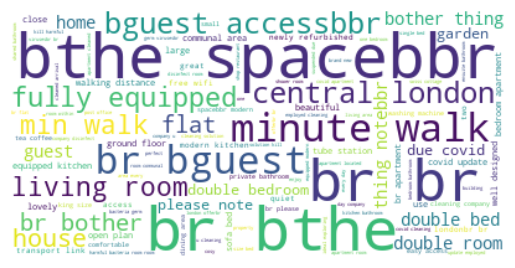

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 合并为长字符串
text = " ".join(description for description in filtered_rows['description'])

# 生成词云
wordcloud = WordCloud(background_color="white").generate(text)

# 显示词云图像
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()